# GEDA
Lau
***

In [96]:
# librerias
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [5]:
# importamos datos con cambios de EDA
df = pd.read_csv('data_consumo_agua.csv')

In [3]:
df.head()

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,Gustavo A. Madero,42.566364,468.23,gustavo a. madero,7 de noviembre,53.24,631.00,42.066667,3.05,3,3.05,57250,alto,19.455260,-99.112662
1,0.00,2019,Gustavo A. Madero,35.936667,107.81,gustavo a. madero,7 de noviembre,0.00,115.13,28.782500,7.32,3,7.32,57253,medio,19.455260,-99.112662
2,0.00,2019,Gustavo A. Madero,24.586000,122.93,gustavo a. madero,7 de noviembre,0.00,197.96,32.993333,75.03,3,75.03,57255,popular,19.455720,-99.113582
3,0.00,2019,Gustavo A. Madero,0.000000,0.00,gustavo a. madero,nueva tenochtitlan,0.00,253.53,84.510000,84.51,3,253.53,57267,bajo,19.459647,-99.104469
4,56.72,2019,Azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.72,839.35,76.304545,121.57,3,243.14,57330,bajo,19.474161,-99.146750


## Preguntas y Observaciones

### Sobre posibles errores en la transferencia de datos

 Notemos que en Iztapalapa es notablemente mayor al resto de las alcaldías el número de registros con cero consumo total de agua:

In [26]:
df[df.consumo_total == 0].groupby(['alcaldia'], as_index=False)['gid']\
                        .count()\
                        .rename(columns={'gid': 'cero_consumo_total'})

,alcaldia,cero_consumo_total
0,alvaro obregon,55
1,azcapotzalco,25
2,benito juarez,34
3,coyoacan,136
4,cuajimalpa,37
5,cuauhtemoc,28
6,gustavo a. madero,159
7,iztacalco,22
8,iztapalapa,1119
9,magdalena contreras,115


 Esto podría representar un error en la transferencia de datos, o bien, podría ser un comportamiento normal para esta alcaldía, por ello consideramos importante comentar esto con negocio.

In [41]:
df[df.consumo_total == 0].groupby(['alcaldia'], as_index=False)\
                        .agg({'consumo_total_mixto': 'count',
                              'consumo_total_dom': 'count',
                              'consumo_total_no_dom': 'count'})

,alcaldia,consumo_total_mixto,consumo_total_dom,consumo_total_no_dom
0,alvaro obregon,32,32,55
1,azcapotzalco,17,17,25
2,benito juarez,23,23,34
3,coyoacan,86,86,136
4,cuajimalpa,24,24,37
5,cuauhtemoc,19,19,28
6,gustavo a. madero,103,103,159
7,iztacalco,15,15,22
8,iztapalapa,750,748,1119
9,magdalena contreras,75,75,115


 En particular, Iztapalapa consume mucha agua en entidades no domiciliadas.

### Variables categóricas

### Información por alcaldía

/home/ltejadal/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'gustavo a. madero'),
 Text(1, 0, 'azcapotzalco'),
 Text(2, 0, 'coyoacan'),
 Text(3, 0, 'tlalpan'),
 Text(4, 0, 'milpa alta'),
 Text(5, 0, 'alvaro obregon'),
 Text(6, 0, 'cuajimalpa'),
 Text(7, 0, 'tlahuac'),
 Text(8, 0, 'magdalena contreras'),
 Text(9, 0, 'xochimilco'),
 Text(10, 0, 'iztapalapa'),
 Text(11, 0, 'iztacalco'),
 Text(12, 0, 'benito juarez'),
 Text(13, 0, 'miguel hidalgo'),
 Text(14, 0, 'cuauhtemoc'),
 Text(15, 0, 'venustiano carranza')]

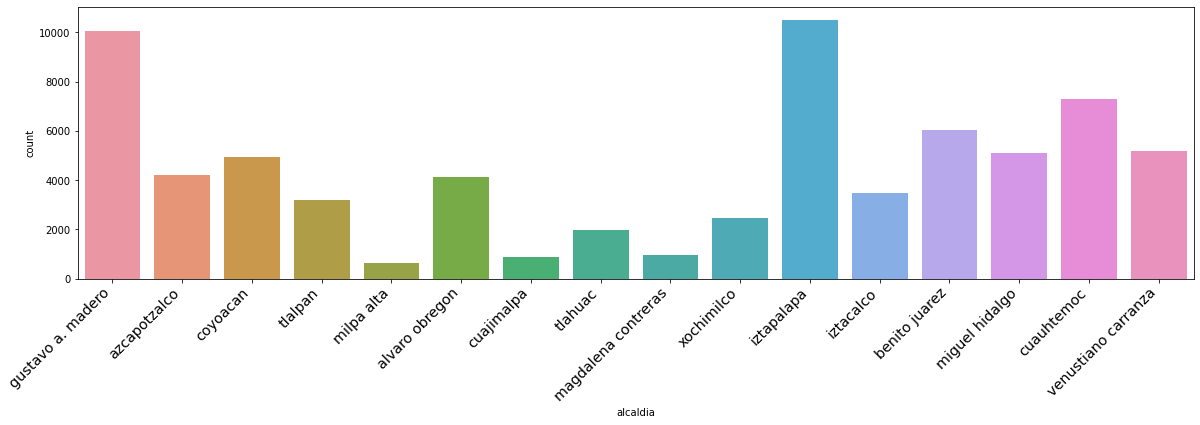

In [64]:
plt.figure(figsize=(20,5))
chart = sns.countplot(df['alcaldia'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize='x-large')

## Preguntas

¿Hay algún bimestre o alguna alcaldía para la que tengamos más/menos información? ¿la proporción de la información coincide con el tamaño de la alcaldía? Esto es para identificar si nos faltaron datos y checar si la muestra está desbalanceada.

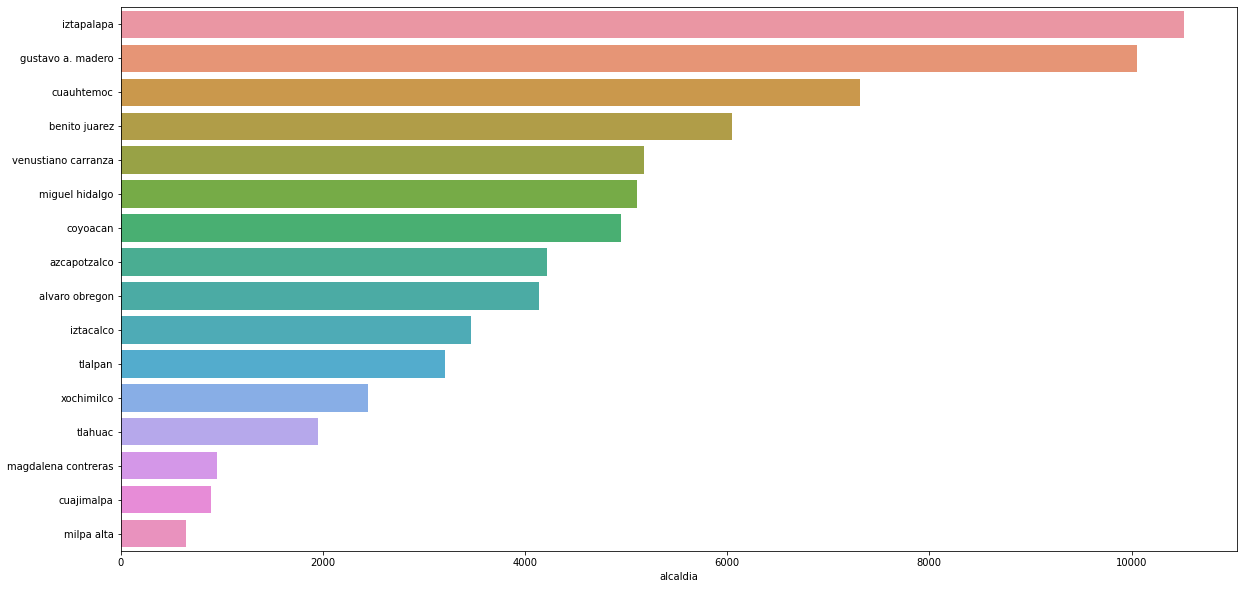

In [6]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=df.alcaldia.value_counts(), y=df.alcaldia.value_counts().index, data=df)

 Tenemos notablemente más información en Iztapalaba y Gustavo A. Madero, mientras que de las alcaldías en que tenemos menos información son la Magdalena Contreras, Cuajimalpa y Milpa Alta. De entrada vemos que un modelo que considere a las alcaldías (y muy probablemente así sea) en sus entradas estará desbalanceado.
 Tomando esto en cuenta valdrá la pena preguntarnos si estas cifras hacen sentido con la cantidad de entidades existentes en cada una de las alcaldías, para identificar si la las proporcioenes en la muestra son erróneas. Adicionalmente nos interesará saber si la cantidad de valores faltantes en el consumo de agua es proporcional a al volumen de alcaldías, o si nos falta información para alguna de estas (o en algún bimestre en particular) 

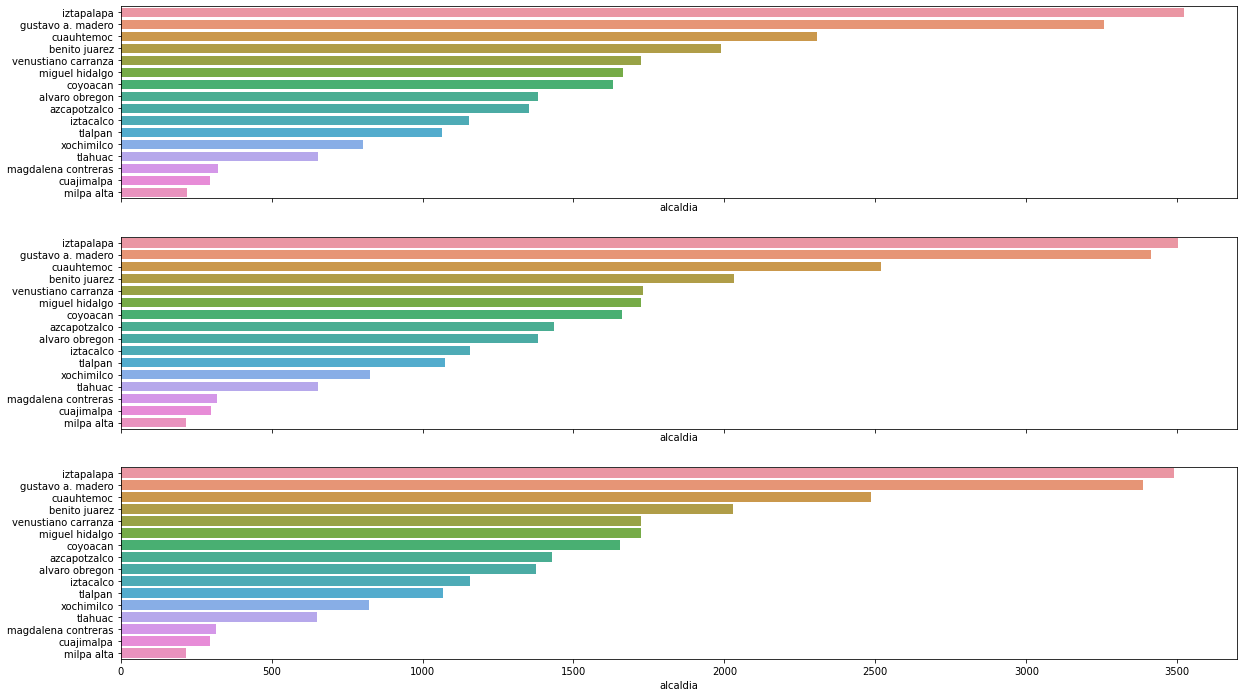

In [30]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,12))
ax = sns.barplot(ax=axes[0], x=df[df['bimestre'] == 1].alcaldia.value_counts(),
                 y=df[df['bimestre'] == 1].alcaldia.value_counts().index, data=df[df['bimestre'] == 1])
ax = sns.barplot(ax=axes[1], x=df[df['bimestre'] == 2].alcaldia.value_counts(),
                 y=df[df['bimestre'] == 2].alcaldia.value_counts().index, data=df[df['bimestre'] == 2])
ax = sns.barplot(ax=axes[2], x=df[df['bimestre'] == 3].alcaldia.value_counts(),
                 y=df[df['bimestre'] == 3].alcaldia.value_counts().index, data=df[df['bimestre'] == 3])

 Notemos que la información que tenemos es consistente en cada bimestre, por lo que no parece que se haya perdido información para ninguna de las alcaldías en particular en algún bimestre.

## ¿Cómo es el índice de desarrollo en cada alcaldía? ¿Hay alguna para la que el índice de desarrollo sea mayor? ¿cómo cambia esta cantidad por bimestre?

In [212]:
# aún no lo he hecho hehehe

## Análisis de valores faltantes.

In [61]:
df_missing_values = df.groupby(['bimestre', 'alcaldia'])\
                            .agg({'consumo_total_mixto': lambda x: x.isnull().sum(),
                           'consumo_total_dom': lambda x: x.isnull().sum(),
                           'consumo_total_no_dom': lambda x: x.isnull().sum(),
                           'consumo_prom_mixto': lambda x: x.isnull().sum(),
                           'consumo_prom_dom': lambda x: x.isnull().sum(),
                           'consumo_prom_no_dom': lambda x: x.isnull().sum()})\
                            .reset_index()
df_missing_values.head()

,bimestre,alcaldia,consumo_total_mixto,consumo_total_dom,consumo_total_no_dom,consumo_prom_mixto,consumo_prom_dom,consumo_prom_no_dom
0,1,alvaro obregon,620.0,196.0,0.0,620.0,196.0,0.0
1,1,azcapotzalco,295.0,172.0,0.0,295.0,172.0,0.0
2,1,benito juarez,455.0,109.0,0.0,455.0,109.0,0.0
3,1,coyoacan,882.0,430.0,0.0,882.0,430.0,0.0
4,1,cuajimalpa,146.0,57.0,0.0,146.0,57.0,0.0


In [48]:
df_missing_values[df_missing_values.bimestre == 1]

,bimestre,alcaldia,consumo_total_mixto,consumo_total_dom,consumo_total_no_dom,consumo_prom_mixto,consumo_prom_dom,consumo_prom_no_dom
8,1,iztapalapa,1796.0,1578.0,0.0,1796.0,1578.0,0.0
6,1,gustavo a. madero,871.0,538.0,0.0,871.0,538.0,0.0
2,1,benito juarez,455.0,109.0,0.0,455.0,109.0,0.0
13,1,tlalpan,712.0,487.0,0.0,712.0,487.0,0.0
3,1,coyoacan,882.0,430.0,0.0,882.0,430.0,0.0
5,1,cuauhtemoc,587.0,351.0,0.0,587.0,351.0,0.0
0,1,alvaro obregon,620.0,196.0,0.0,620.0,196.0,0.0
12,1,tlahuac,263.0,191.0,0.0,263.0,191.0,0.0
10,1,miguel hidalgo,638.0,177.0,0.0,638.0,177.0,0.0
1,1,azcapotzalco,295.0,172.0,0.0,295.0,172.0,0.0


In [62]:
df.groupby(['bimestre', 'alcaldia'])\
.agg({'consumo_total_mixto': lambda x: x.count(),
'consumo_total_dom': lambda x: x.isnull().sum(),
'consumo_total_no_dom': lambda x: x.isnull().sum(),
'consumo_prom_mixto': lambda x: x.isnull().sum(),
'consumo_prom_dom': lambda x: x.isnull().sum(),
'consumo_prom_no_dom': lambda x: x.isnull().sum()})

consumo_total_mixto  consumo_total_dom  \
bimestre alcaldia                                                      
1        alvaro obregon                     762.0              196.0   
         azcapotzalco                      1057.0              172.0   
         benito juarez                     1534.0              109.0   
         coyoacan                           750.0              430.0   
         cuajimalpa                         150.0               57.0   
         cuauhtemoc                        1720.0              351.0   
         gustavo a. madero                 2387.0              538.0   
         iztacalco                          963.0               64.0   
         iztapalapa                        1725.0             1578.0   
         magdalena contreras                123.0              125.0   
         miguel hidalgo                    1025.0              177.0   
         milpa alta                         130.0               88.0   
         tlahuac                            390.0              191.0   
         tlalpan                            352.0              487.0   
         venustiano carranza               1377.0              153.0   
         xochimilco                         566.0              104.0   
2        alvaro obregon                    1383.0                0.0   
         azcapotzalco                      1434.0                0.0   
         benito juarez                     2032.0                0.0   
         coyoacan                          1662.0                0.0   
         cuajimalpa                         300.0                0.0   
         cuauhtemoc                        2519.0                0.0   
         gustavo a. madero                 3412.0                0.0   
         iztacalco                         1158.0                0.0   
         iztapalapa                        3504.0                0.0   
         magdalena contreras                318.0                0.0   
         miguel hidalgo                    1724.0                0.0   
         milpa alta                         217.0                0.0   
         tlahuac                            652.0                0.0   
         tlalpan                           1073.0                0.0   
         venustiano carranza               1729.0                0.0   
         xochimilco                         825.0                0.0   
3        alvaro obregon                    1375.0                0.0   
         azcapotzalco                      1430.0                0.0   
         benito juarez                     2028.0                0.0   
         coyoacan                          1653.0                0.0   
         cuajimalpa                         296.0                0.0   
         cuauhtemoc                        2487.0                0.0   
         gustavo a. madero                 3388.0                0.0   
         iztacalco                         1157.0                0.0   
         iztapalapa                        3490.0                0.0   
         magdalena contreras                316.0                0.0   
         miguel hidalgo                    1723.0                0.0   
         milpa alta                         215.0                0.0   
         tlahuac                            650.0                0.0   
         tlalpan                           1067.0                0.0   
         venustiano carranza               1725.0                0.0   
         xochimilco                         822.0                0.0   

                              consumo_total_no_dom  consumo_prom_mixto  \
bimestre alcaldia                                                        
1        alvaro obregon                        0.0               620.0   
         azcapotzalco                          0.0               295.0   
         benito juarez                         0.0               455.0   
         coyoacan                              0.0         

 Lo primero que notamos es que todos los valores faltantes son en las variables numéricas, y que además todas ellas corresponden al primer bimestre del año, por lo que valdrá la pena comentar con negocio e investigar por qué únicamente en estas fechas nos falta información.

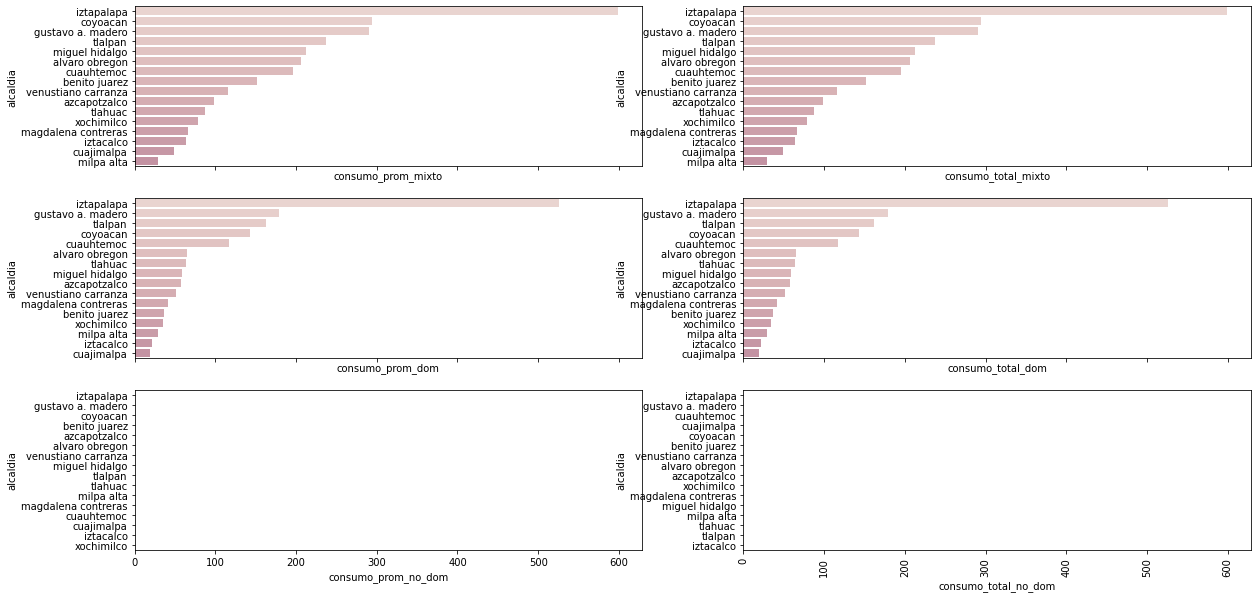

In [33]:
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(20,10))


df_missing_values = df_missing_values.sort_values('consumo_prom_mixto', ascending=False)
sns.barplot(ax=axes[0,0], x=df_missing_values['consumo_prom_mixto'], y=df_missing_values['alcaldia'],
                 palette=sns.cubehelix_palette(len(df_missing_values['alcaldia'])), ci=0)
df_missing_values = df_missing_values.sort_values('consumo_prom_dom', ascending=False)
sns.barplot(ax=axes[1,0], x=df_missing_values['consumo_prom_dom'], y=df_missing_values['alcaldia'],
                 palette=sns.cubehelix_palette(len(df_missing_values['alcaldia'])), ci=0)
df_missing_values = df_missing_values.sort_values('consumo_prom_no_dom', ascending=False)
sns.barplot(ax=axes[2,0], x=df_missing_values['consumo_prom_no_dom'], y=df_missing_values['alcaldia'],
                 palette=sns.cubehelix_palette(len(df_missing_values['alcaldia'])), ci=0)

df_missing_values = df_missing_values.sort_values('consumo_total_mixto', ascending=False)
sns.barplot(ax=axes[0,1], x=df_missing_values['consumo_total_mixto'], y=df_missing_values['alcaldia'],
                 palette=sns.cubehelix_palette(len(df_missing_values['alcaldia'])), ci=0)
df_missing_values = df_missing_values.sort_values('consumo_total_dom', ascending=False)
sns.barplot(ax=axes[1,1], x=df_missing_values['consumo_total_dom'], y=df_missing_values['alcaldia'],
                 palette=sns.cubehelix_palette(len(df_missing_values['alcaldia'])), ci=0)
df_missing_values = df_missing_values.sort_values('consumo_total_no_dom', ascending=False)
sns.barplot(ax=axes[2,1], x=df_missing_values['consumo_total_no_dom'], y=df_missing_values['alcaldia'],
                 palette=sns.cubehelix_palette(len(df_missing_values['alcaldia'])), ci=0)



plt.xticks(rotation= 90)
#plt.xlabel('Alcaldía')
#plt.ylabel('Valores Faltantes')
#plt.title('Valores Faltantes de Consumo Promedio Domiciliado en Bimestre 1')
plt.show()

Estas gráficas representan el número de valores faltantes para cada una de las alcaldías. Todos son en el primer bimestre (no hay NAs en los bimestres 2 y 3). Sólo hay valores faltantes para los domiciliados y mixtos, pero en los no domiciliados no hay valores faltantes. Además, los valores faltantes parecen ser más o menos proporcionales a la cantidad de registros que tenemos por alcaldía, por lo que no parece algo preocupante para el proyecto; sin embargo, sí tendríamos que hablar con negocio sobre la significativa falta de información en el primer bimestre.

 Los valores de la gráfica anterior, pero ¿qué pasa con la proporción de los datos faltantes según la cantidad de datos por alcaldía?

In [91]:
df_aux1 = df[ df.bimestre== 1 ].groupby(['alcaldia']).count()

df_aux1  = df_aux1 [['anio']] 


df_aux1  .rename(columns={ 'anio': 'conteo'}, inplace=True)
df_aux1

,conteo
alcaldia,
alvaro obregon,1382
azcapotzalco,1352
benito juarez,1989
coyoacan,1632
cuajimalpa,296
cuauhtemoc,2307
gustavo a. madero,3258
iztacalco,1154
iztapalapa,3521


In [92]:
df_per_miss_values = df_aux1.merge(df_missing_values[df_missing_values.bimestre == 1], on='alcaldia', how='left')
df_per_miss_values

,alcaldia,conteo,bimestre,consumo_total_mixto,consumo_total_dom,consumo_total_no_dom,consumo_prom_mixto,consumo_prom_dom,consumo_prom_no_dom
0,alvaro obregon,1382,1,620.0,196.0,0.0,620.0,196.0,0.0
1,azcapotzalco,1352,1,295.0,172.0,0.0,295.0,172.0,0.0
2,benito juarez,1989,1,455.0,109.0,0.0,455.0,109.0,0.0
3,coyoacan,1632,1,882.0,430.0,0.0,882.0,430.0,0.0
4,cuajimalpa,296,1,146.0,57.0,0.0,146.0,57.0,0.0
5,cuauhtemoc,2307,1,587.0,351.0,0.0,587.0,351.0,0.0
6,gustavo a. madero,3258,1,871.0,538.0,0.0,871.0,538.0,0.0
7,iztacalco,1154,1,191.0,64.0,0.0,191.0,64.0,0.0
8,iztapalapa,3521,1,1796.0,1578.0,0.0,1796.0,1578.0,0.0
9,magdalena contreras,321,1,198.0,125.0,0.0,198.0,125.0,0.0


In [94]:
df_per_miss_values['consumo_total_mixto'] = df_per_miss_values.consumo_total_mixto/df_per_miss_values.conteo
df_per_miss_values['consumo_total_dom'] = df_per_miss_values.consumo_total_dom/df_per_miss_values.conteo
df_per_miss_values['consumo_total_no_dom'] = df_per_miss_values.consumo_total_no_dom/df_per_miss_values.conteo
df_per_miss_values['consumo_prom_mixto'] = df_per_miss_values.consumo_prom_mixto/df_per_miss_values.conteo
df_per_miss_values['consumo_prom_dom'] = df_per_miss_values.consumo_prom_dom/df_per_miss_values.conteo
df_per_miss_values['consumo_prom_no_dom'] = df_per_miss_values.consumo_prom_no_dom/df_per_miss_values.conteo

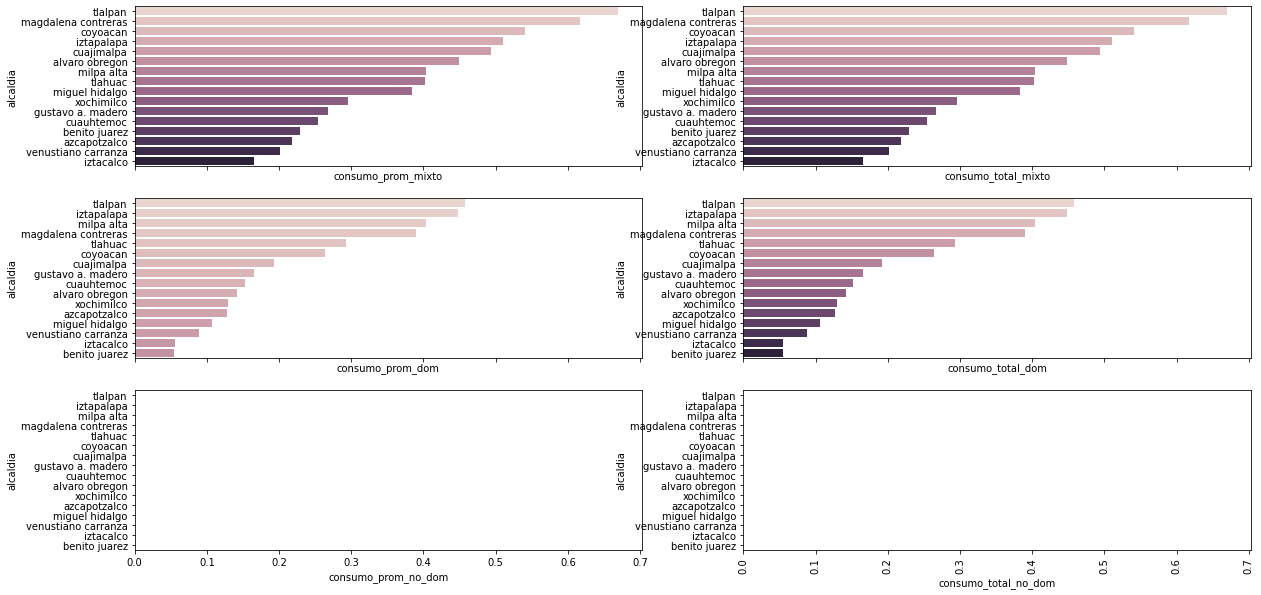

In [95]:
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(20,10))


df_per_miss_values = df_per_miss_values.sort_values('consumo_prom_mixto', ascending=False)
sns.barplot(ax=axes[0,0], x=df_per_miss_values['consumo_prom_mixto'], y=df_per_miss_values['alcaldia'],
                 palette=sns.cubehelix_palette(len(df_per_miss_values['alcaldia'])), ci=0)
df_per_miss_values = df_per_miss_values.sort_values('consumo_prom_dom', ascending=False)
sns.barplot(ax=axes[1,0], x=df_per_miss_values['consumo_prom_dom'], y=df_per_miss_values['alcaldia'],
                 palette=sns.cubehelix_palette(len(df_missing_values['alcaldia'])), ci=0)
df_per_miss_values = df_per_miss_values.sort_values('consumo_prom_no_dom', ascending=False)
sns.barplot(ax=axes[2,0], x=df_per_miss_values['consumo_prom_no_dom'], y=df_per_miss_values['alcaldia'],
                 palette=sns.cubehelix_palette(len(df_per_miss_values['alcaldia'])), ci=0)

df_per_miss_values = df_per_miss_values.sort_values('consumo_total_mixto', ascending=False)
sns.barplot(ax=axes[0,1], x=df_per_miss_values['consumo_total_mixto'], y=df_per_miss_values['alcaldia'],
                 palette=sns.cubehelix_palette(len(df_per_miss_values['alcaldia'])), ci=0)
df_per_miss_values = df_per_miss_values.sort_values('consumo_total_dom', ascending=False)
sns.barplot(ax=axes[1,1], x=df_per_miss_values['consumo_total_dom'], y=df_per_miss_values['alcaldia'],
                 palette=sns.cubehelix_palette(len(df_per_miss_values['alcaldia'])), ci=0)
df_per_miss_values = df_per_miss_values.sort_values('consumo_total_no_dom', ascending=False)
sns.barplot(ax=axes[2,1], x=df_per_miss_values['consumo_total_no_dom'], y=df_per_miss_values['alcaldia'],
                 palette=sns.cubehelix_palette(len(df_per_miss_values['alcaldia'])), ci=0)



plt.xticks(rotation= 90)

plt.show()